In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [ ]:
!ls

다운로드	       dacon	     general_images_data  tistory
데이터분석_실습        Data_set.zip  general_images.zip   데이콘.zip
딥러닝_강의_1주차.zip  dogs_data     gogh.jpg
딥러닝_강의_2주차.zip  dogs.zip      light_intel.zip


In [ ]:
!unzip light_intel.zip

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = '/content/drive/My Drive/data/seg_train/'
test_path = '/content/drive/My Drive/data/seg_test/'

Found 3000 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3000 files belonging to 6 classes.
Found 600 files belonging to 6 classes.


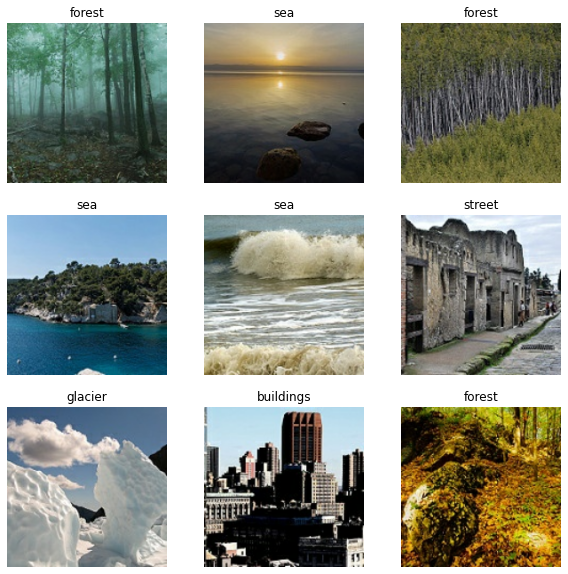

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

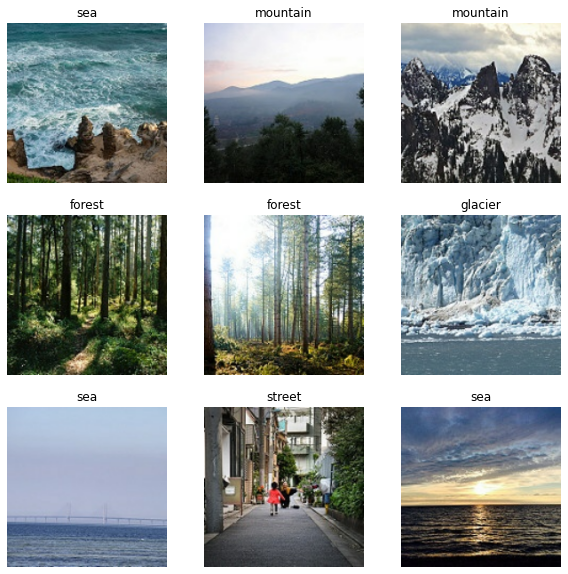

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

train_normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_normalized_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

train_image_batch, train_labels_batch = next(iter(train_normalized_ds))
test_image_batch, test_labels_batch = next(iter(test_normalized_ds))

In [ ]:
#batch_size=32, tensor크기

print(train_image_batch.shape)
print(test_image_batch.shape)

(32, 180, 180, 3)
(32, 180, 180, 3)


In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTO)
test_ds = test_ds.cache().prefetch(buffer_size=AUTO)